# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Arjikusna Maharjanta
- **Email:** arjiduba@gmail.com
- **ID Dicoding:** arrvold

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Adakah perbedaan jumlah penyewa casual dan ter-registrasi
- Apakah terdapat perbedaan pola penyewaan berdasarkan hari kerja dan hari libur?
- Bagaimana perkembangan penyewaan sepeda per bulan dalam range dua tahun berdasarkan jenis penyewa

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('sewaSepeda/day.csv')
hour_df = pd.read_csv('sewaSepeda/hour.csv')
display(day_df.head())
display(hour_df.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Mengumpulkan data set dari day.csv yang kemudian disimpan dalam dataframe day_df lalu ditampilkan
- Mengumpulkan data set dari hour.csv yang kemudian disimpan dalam dataframe hour_df lalu ditampilkan

### Assessing Data

In [3]:
day_df.info()
display(day_df.isna().sum())
print("Jumlah duplikasi: ", day_df.duplicated().sum())
display(day_df.describe())

hour_df.info()
display(hour_df.isna().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
display(hour_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Menilai data yang ada dalam day.csv dan hour.csv terdapat kesalahan atau tidak
- Terdapat kesalahan tipe data pada kolom dtday pada kedua file (seharusnya bertipe datetime bukan object)

### Cleaning Data

In [4]:
#Mengubah tipe data dtday
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Mengubah tipedata dtday pada kedua data set menjadi date time

## Exploratory Data Analysis (EDA)

### Explore Day Dataset dan Hour Dataset

In [5]:
display(hour_df.describe(include="all"))
display(day_df.describe(include="all"))

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [6]:
hour_df.groupby(by="weathersit")["cnt"].sum().sort_values(ascending=False)

weathersit
1    2338173
2     795952
3     158331
4        223
Name: cnt, dtype: int64

Kode diatas berfungsi untuk menampilkan data jumlah penyewa yang diambil dari kolom instant, lalu dikelompokkan berdasarkan cuaca. Berdasarkan data diatas, penyewaan sepeda paling banyak terjadi ketika cuaca berniali 1 (Clear, Few clouds, Partly cloudy, Partly cloudy)

In [7]:
total_registered = hour_df["registered"].sum()
total_casual = hour_df["casual"].sum()

print(f"Total Registered Users: {total_registered}")
print(f"Total Casual Users: {total_casual}")

Total Registered Users: 2672662
Total Casual Users: 620017


Kode diatas menampilkan perbandingan antara total casual users dan total registered users. Dari data dapat disimpulkan bahwa penyewa terbanyak merupakan registered user.

In [8]:
average_rentals = day_df.groupby(["holiday", "workingday"])["cnt"].mean().reset_index()

print(average_rentals)

   holiday  workingday          cnt
0        0           0  4389.685714
1        0           1  4584.820000
2        1           0  3735.000000


In [9]:
# Ekstrak bulan dan tahun
day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month

# Agregasi data penyewaan per bulan
monthly_rentals = day_df.groupby(['year', 'month']).agg({
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

print(monthly_rentals)

    year  month  casual  registered
0   2011      1    3073       35116
1   2011      2    6242       41973
2   2011      3   12826       51219
3   2011      4   22346       72524
4   2011      5   31050      104771
5   2011      6   30612      112900
6   2011      7   36452      104889
7   2011      8   28842      107849
8   2011      9   26545      100873
9   2011     10   25222       98289
10  2011     11   15594       86573
11  2011     12    8448       78875
12  2012      1    8969       87775
13  2012      2    8721       94416
14  2012      3   31618      133257
15  2012      4   38456      135768
16  2012      5   44235      151630
17  2012      6   43294      159536
18  2012      7   41705      161902
19  2012      8   43197      171306
20  2012      9   43778      174795
21  2012     10   34538      164303
22  2012     11   21009      131655
23  2012     12   13245      110468


**Insight:**
- Mendapatkan beberapa informasi setelah melakukan analisis data untuk menjawab beberapa pertanyaan yang telah dideklarasikan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

C:\Users\HP\AppData\Local\Temp\ipykernel_6988\1787987134.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_rentals.index, y=weather_rentals.values, palette="tab10")


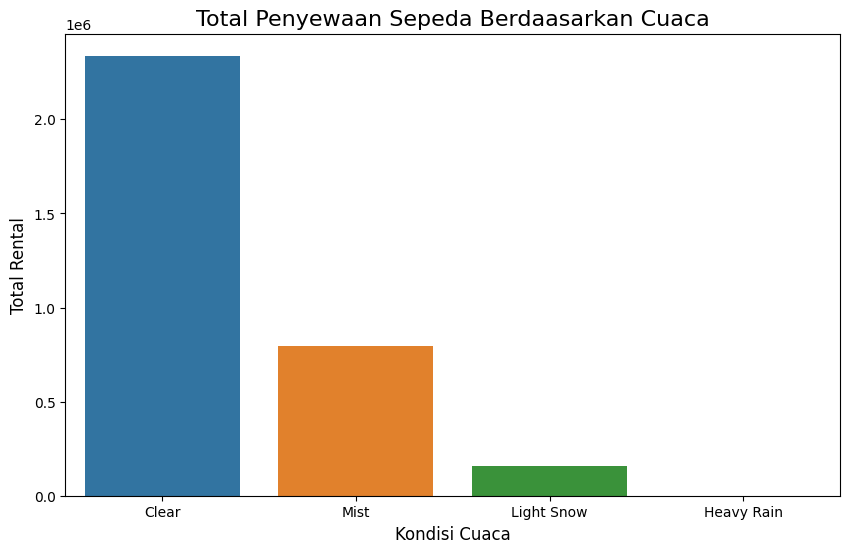

In [10]:
# Membuat mapping untuk weathersit
weather_mapping = {
    1: "Clear",
    2: "Mist",
    3: "Light Snow",
    4: "Heavy Rain"
}

# Mengganti nilai weathersit dengan label deskriptif
hour_df['weathersit'] = hour_df['weathersit'].replace(weather_mapping)

# Mengelompokkan data berdasarkan kondisi cuaca (weathersit), menghitung total penyewaan (cnt), dan mengurutkan
weather_rentals = hour_df.groupby(by="weathersit")["cnt"].sum().sort_values(ascending=False)

# Membuat plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=weather_rentals.index, y=weather_rentals.values, palette="tab10")

# Memberi judul dan label sumbu
plt.title("Total Penyewaan Sepeda Berdaasarkan Cuaca", fontsize=16)
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Total Rental", fontsize=12)

# Menampilkan plot
plt.show()

### Pertanyaan 2: Adakah perbedaan jumlah penyewa casual dan ter-registrasi

C:\Users\HP\AppData\Local\Temp\ipykernel_6988\485192581.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='User Type', y='Total', data=users_df, palette=colors)


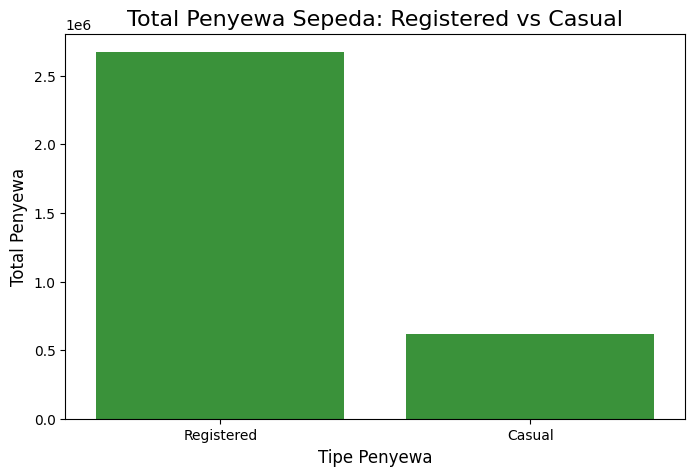

In [11]:
# Buat DataFrame untuk total pengguna
data = {
    'User Type': ['Registered', 'Casual'],
    'Total': [total_registered, total_casual]
}
users_df = pd.DataFrame(data)

# Buat bar chart
plt.figure(figsize=(8, 5))
colors = ['#2ca02c', '#2ca02c']
sns.barplot(x='User Type', y='Total', data=users_df, palette=colors)

# Memberi judul dan label sumbu
plt.title('Total Penyewa Sepeda: Registered vs Casual', fontsize=16)
plt.xlabel('Tipe Penyewa', fontsize=12)
plt.ylabel('Total Penyewa', fontsize=12)

# Menampilkan plot
plt.show()

### Pertanyaan 3: Apakah terdapat perbedaan pola penyewaan berdasarkan hari kerja dan akhir pekan?

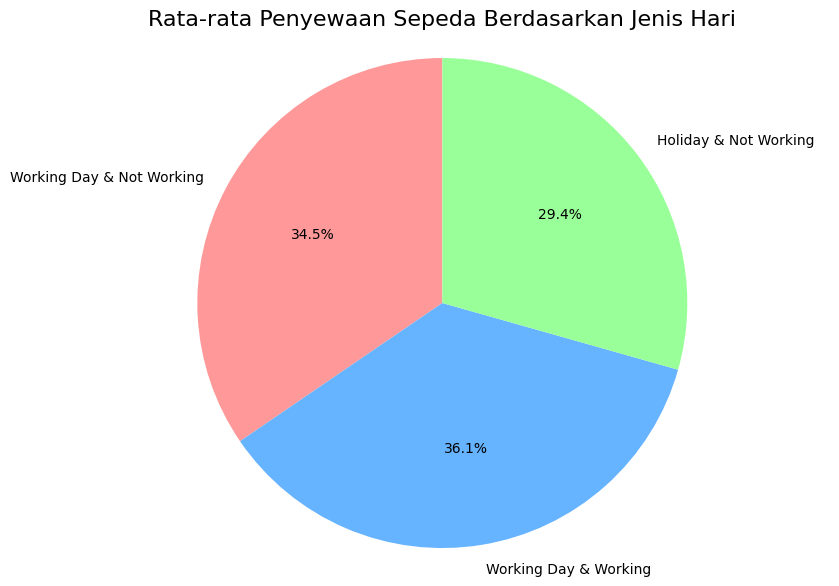

In [12]:
# Mengonversi kolom boolean menjadi string agar mudah dimengerti
average_rentals['holiday'] = average_rentals['holiday'].map({0: 'Working Day', 1: 'Holiday'})
average_rentals['workingday'] = average_rentals['workingday'].map({0: 'Not Working', 1: 'Working'})

# Gabungkan kolom untuk label pie chart
average_rentals['label'] = average_rentals['holiday'] + " & " + average_rentals['workingday']

# Ambil nilai rata-rata penyewaan untuk setiap kombinasi
sizes = average_rentals['cnt']

# Buat pie chart
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=average_rentals['label'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff', '#99ff99', '#ffcc99'])

# Menambahkan judul
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jenis Hari', fontsize=16)

# Menampilkan plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

### Pertanyaan 4: Bagaimana perkembangan penyewaan sepeda per bulan dalam range dua tahun berdasarkan jenis penyewa

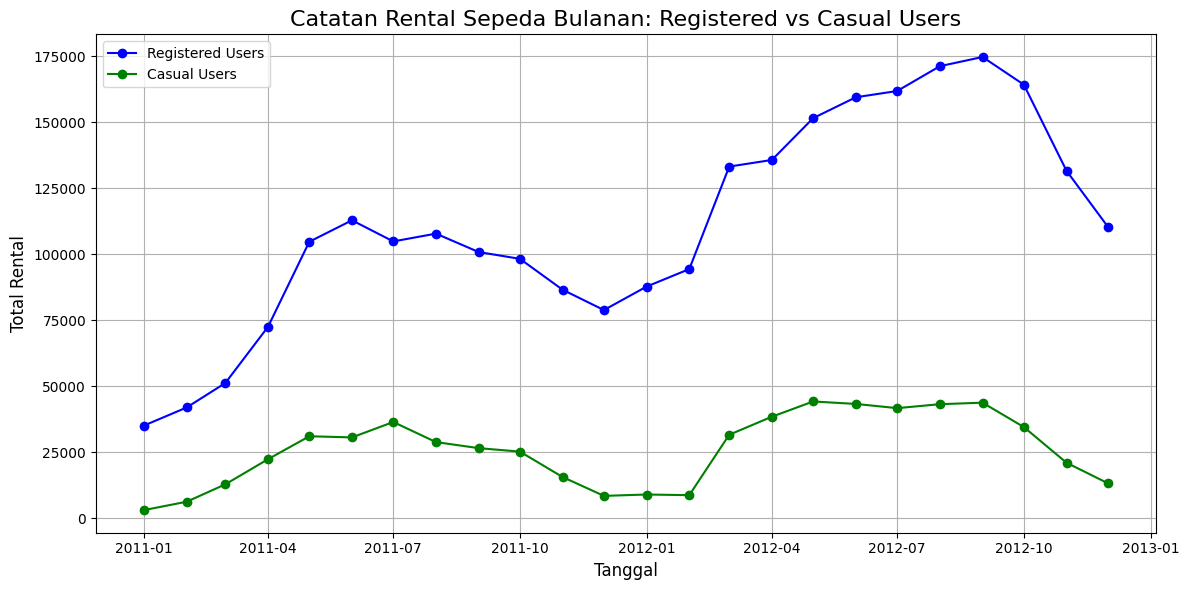

In [14]:
# Buat kolom 'date' untuk x-axis dengan hari pertama setiap bulan
monthly_rentals['date'] = pd.to_datetime(monthly_rentals[['year', 'month']].assign(day=1))
plt.figure(figsize=(12, 6))

# Menggambar garis untuk pengguna terdaftar
plt.plot(monthly_rentals['date'], monthly_rentals['registered'], marker='o', label='Registered Users', color='blue')

# Menggambar garis untuk pengguna kasual
plt.plot(monthly_rentals['date'], monthly_rentals['casual'], marker='o', label='Casual Users', color='green')

# Menambahkan judul dan label
plt.title('Catatan Rental Sepeda Bulanan: Registered vs Casual Users', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Total Rental', fontsize=12)
#plt.xticks(rotation=45)  # Memutar label x-axis agar lebih terbaca
plt.legend()

# Menampilkan grid
plt.grid()

# Menampilkan plot
plt.tight_layout()  # Mengatur layout agar tidak terpotong
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda : Berdasarkan data yang telah diolah dan dianalisis, semakin baik cuaca makan penyewaan sepeda semakin banyak. Hal ini ditunjukan dengan penyewaan terbanyak ada di cuaca (Clear, Few clouds, Partly cloudy, Partly cloudy) sedangkan penyewaan terendah ada di cuaca (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)
- Adakah perbedaan jumlah penyewa casual dan ter-registrasi : Perbedaan terlihat ketika membandingkan data jumlah total penyewa kasual dan penyewa yang ter-registrasi. Dari data yang diambil, jumlah registered users berbeda empat kali lipat dibandingkan casual users
- Apakah terdapat perbedaan pola penyewaan berdasarkan hari kerja dan akhir pekan : Berdasarkan data penyewa terbesar terjadi di hari kerja, disusul di hari kerja tetapi libur, dan yang terakhir di hari libur (bukan hari kerja)
- Bagaimana perkembangan penyewaan sepeda per bulan dalam range dua tahun berdasarkan jenis penyewa : Terjadi kenaikan dan penurunan penyewa setiap bulan, dimana titik puncak penyewa ada di bulan September 2012